In [1]:
import os
import sys
import glob
sys.path.append('..') #Adding the parent folder to import files from there

In [2]:
import engine.loader as loader
import engine.models.rnn as rnn
from ipywidgets import FloatProgress

In [3]:
source = [
    ('firstname', 'firstnames.firstname', 100),
    
    ('name', 'names.name', 100),
    
    ('code', 'patients.gender', 10),
    ('code', 'admissions.marital_status', 10),
    ('code', 'admissions.religion', 10),
    ('code', 'admissions.insurance', 10),
    ('code', 'admissions.admission_location', 10),
    ('code', 'prescriptions.drug_type', 30),
    ('code', 'prescriptions.dose_unit_rx', 20),
    
    ('date', 'prescriptions.startdate', 90),
    ('date', 'admissions.admittime', 10),
    
    ('id', 'admissions.hadm_id', 10),
    ('id', 'admissions.subject_id', 10),
    ('id', 'prescriptions.subject_id', 80),
    
    ('address', 'addresses.road', 100),
    
    ('city', 'addresses.city', 100)
]

In [4]:
dataset = []
labels = []
for column in source:
    if len(column) >= 3:
        label, column_name, nb_datasets = column
    else:
        label, column_name, nb_datasets = column, 1
    dataset.append((column_name, nb_datasets))
    labels += [label.upper()] * nb_datasets

In [5]:
%%time

max_value = len(labels)
bar = FloatProgress(min=0, max=max_value)
display(bar)

columns = loader.fetch_columns(dataset, dataset_size=100, load_bar=bar)

FloatProgress(value=0.0, max=700.0)

CPU times: user 1.77 s, sys: 278 ms, total: 2.04 s
Wall time: 3.95 s


In [6]:
clf = rnn.RNNClassifier(rnn.RNN, 128)
X_train, y_train, X_test, y_test = clf.preprocess(columns, labels)

In [7]:
%%time

clf.fit(X_train, y_train)

1000 10% (0m 2s) 1.9610 2112-02-08t00:00:00 / ID ✗ (DATE)
2000 20% (0m 5s) 1.8425 40277 / ID ✓
3000 30% (0m 9s) 1.9735 evy / CITY ✗ (FIRSTNAME)
4000 40% (0m 12s) 1.9836 lagravere / ADDRESS ✗ (NAME)
5000 50% (0m 15s) 1.8492 rue de la clef des champs / ADDRESS ✓
6000 60% (0m 17s) 1.9684 2127-10-16t00:00:00 / ID ✗ (DATE)
7000 70% (0m 20s) 2.0045 fagart / ADDRESS ✗ (NAME)
8000 80% (0m 23s) 1.9965 2119-11-10t00:00:00 / ID ✗ (DATE)
9000 90% (0m 26s) 2.0493 rosita / ADDRESS ✗ (FIRSTNAME)
10000 100% (0m 29s) 1.6809 pagny-sur-moselle / ADDRESS ✗ (CITY)
CPU times: user 29.3 s, sys: 401 ms, total: 29.7 s
Wall time: 30.1 s


In [8]:
y_pred = clf.predict(X_test, sampling=0.4)
clf.score(y_pred, y_test)

FIRSTNAME           	0/23	   0.0% 	(FP:0)
NAME                	0/18	   0.0% 	(FP:0)
CODE                	0/17	   0.0% 	(FP:0)
DATE                	0/15	   0.0% 	(FP:0)
ID                  	27/27	   100.0% 	(FP:15)
ADDRESS             	25/25	   100.0% 	(FP:50)
CITY                	0/15	   0.0% 	(FP:23)
SCORE 52/140 :   37.14%


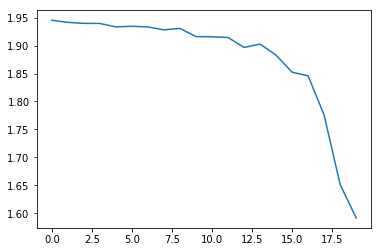

In [9]:
clf.plot_losses()